In [3]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [4]:
# For demonstration perposes, the object is chosen at random from the sample list - 
# Nothing significant about it

data = fits.open('/Volumes/WD_External/MaNGA_Sample_with_[OIII]/manga-8135-1902-LOGCUBE.fits.gz')

In [24]:
# data.info()

In [5]:
flux = np.transpose(data['FLUX'].data, axes=(2, 1, 0))

In [6]:
z = 0.117997

In [7]:
mask = np.transpose(data['MASK'].data, axes=(2, 1, 0))

In [86]:
ivar = np.transpose(data['IVAR'].data, axes=(2, 1, 0))

In [18]:
wave = data['WAVE'].data
wave

array([ 3621.59598486,  3622.42998417,  3623.26417553, ...,
       10349.03843826, 10351.42166679, 10353.80544415])

In [9]:
flux_header  = data['FLUX'].header

In [23]:
x_center = int(flux_header['CRPIX1']) - 1
y_center = int(flux_header['CRPIX2']) - 1

do_not_use = (mask & 2**10) != 0
flux_m = np.ma.array(flux, mask=do_not_use)

redshift = 0.131681
ind_wave = np.where((wave / (1 + redshift) > 4900) & (wave / (1 + redshift) < 5100))[0]
halpha = flux_m[:, :, ind_wave].sum(axis=2)
im = halpha.T

# Convert from array indices to arcsec relative to IFU center
dx = flux_header['CD1_1'] * 3600.  # deg to arcsec
dy = flux_header['CD2_2'] * 3600.  # deg to arcsec
x_extent = (np.array([0., im.shape[0]]) - (im.shape[0] - x_center)) * dx * (-1)
y_extent = (np.array([0., im.shape[1]]) - (im.shape[1] - y_center)) * dy
extent = [x_extent[0], x_extent[1], y_extent[0], y_extent[1]]

In [24]:
dimension = [0, len(flux[0]), 0, len(flux)]
dimension

[0, 34, 0, 34]

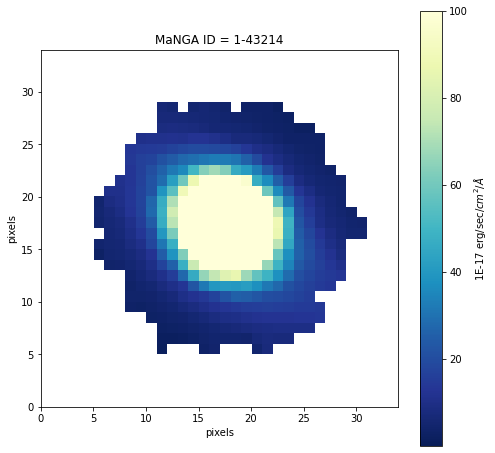

In [25]:
plt.figure(figsize = (8,8))
# plt.grid()
plt.imshow(im, extent=dimension, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none')
plt.xlabel('pixels')
plt.ylabel('pixels')
plt.title('MaNGA ID = 1-43214')
plt.colorbar(label = '1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$')
plt.plot()
# plt.savefig('Images/1-43214_pixels')

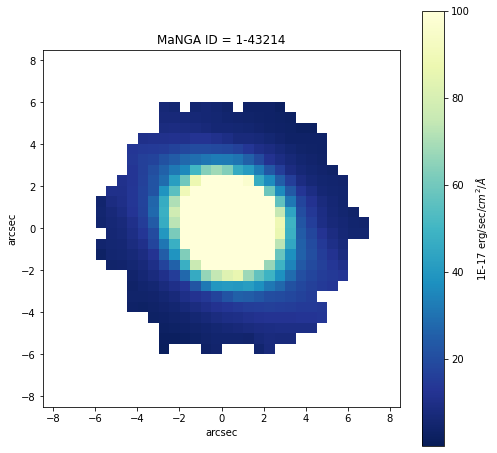

In [26]:
plt.figure(figsize = (8,8))
# plt.grid()
plt.imshow(im, extent=extent, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none')
plt.xlabel('arcsec')
plt.ylabel('arcsec')
plt.title('MaNGA ID = 1-43214')
plt.colorbar(label = '1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$')
plt.plot()
# plt.savefig('Images/1-43214_arcsec')

In [27]:
def imageGenerator(data, z, mangaID):
    flux = np.transpose(data['FLUX'].data, axes=(2, 1, 0))
    mask = np.transpose(data['MASK'].data, axes=(2, 1, 0))
    wave = data['WAVE'].data
    flux_header  = data['FLUX'].header
    
    x_center = int(flux_header['CRPIX1']) - 1
    y_center = int(flux_header['CRPIX2']) - 1

    do_not_use = (mask & 2**10) != 0
    flux_m = np.ma.array(flux, mask=do_not_use)

    redshift = 0.131681
    ind_wave = np.where((wave / (1 + redshift) > 5000) & (wave / (1 + redshift) < 5150))[0]
    halpha = flux_m[:, :, ind_wave].sum(axis=2)
    im = halpha.T

    # Convert from array indices to arcsec relative to IFU center
    dx = flux_header['CD1_1'] * 3600.  # deg to arcsec
    dy = flux_header['CD2_2'] * 3600.  # deg to arcsec

    dimension = [0, len(flux[0]), 0, len(flux)]
    
    plt.figure(figsize = (8,8))
    plt.imshow(im, extent=dimension, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none')
    plt.xlabel('pixels')
    plt.ylabel('pixels')
    plt.title('MaNGA ID = ', mangaID)
    plt.plot()

In [28]:
n = len(flux[0])
sumflux = np.zeros(4563)

for i in range(n):
    for j in range(n):
        sumflux = np.add(sumflux, flux[i,j])

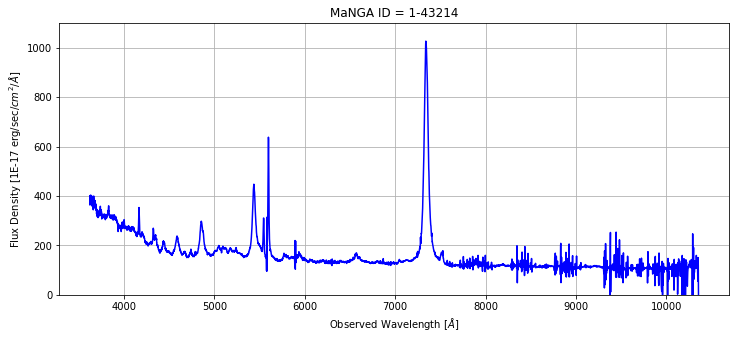

In [51]:
plt.figure(figsize = (12,5))
plt.grid()
plt.xlabel('Observed Wavelength '+ r'$[\AA]$')
plt.ylabel('Flux Density '+'[1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.ylim(0,1100)
# plt.xlim(6500,6600)
# plt.vlines(x=[5550,5600], ymin = min(sumflux), ymax = max(sumflux), linewidth = 3)
# plt.vlines(x=[4840,4880], ymin = min(sumflux), ymax = max(sumflux), color = 'orange', linewidth = 3)
# plt.axvline(5007, color = 'mediumseagreen', linewidth = 3)
plt.title('MaNGA ID = 1-43214')
plt.plot(wave, sumflux, color = 'blue')
# plt.savefig('Images/1-43214_flux_density_observed', bbox_inches= "tight")

In [52]:
emitwave = np.array(wave) / (1+z)

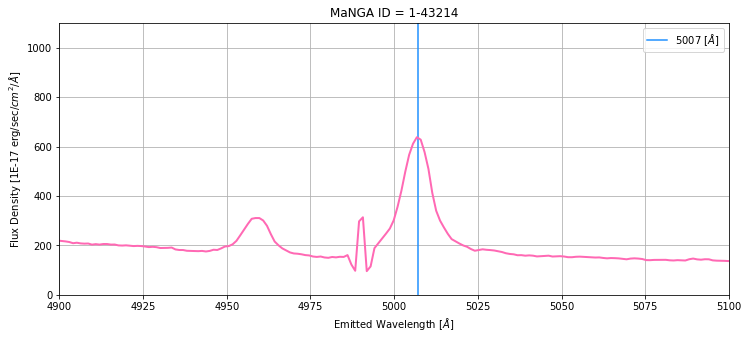

In [100]:
plt.figure(figsize = (12,5))
plt.grid()
plt.xlabel('Emitted Wavelength '+ r'$[\AA]$')
plt.ylabel('Flux Density '+'[1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.ylim(0,1100)
plt.xlim(4900,5100)
# plt.vlines(x=[5550,5600], ymin = min(sumflux), ymax = max(sumflux), linewidth = 3)
# plt.vlines(x=[4840,4880], ymin = min(sumflux), ymax = max(sumflux), color = 'orange', linewidth = 3)
plt.axvline(5007, color = 'dodgerblue',  label = '5007 ' +r'[$\AA$]' )
plt.title('MaNGA ID = 1-43214')
plt.legend()
plt.plot(emitwave, sumflux, color = 'hotpink', linewidth = 2)
# plt.savefig('Images/1-43214_flux_density_emitted_zoomed', bbox_inches= "tight")

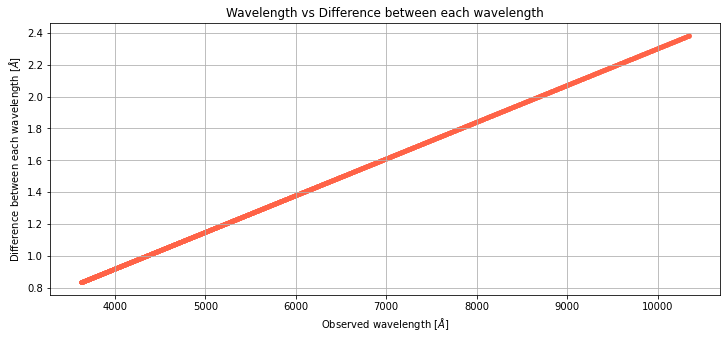

In [64]:
dlmd = np.array([])

for i in range(1, len(wave)):
    diff = wave[i] - wave[i-1]
    dlmd = np.append(dlmd, diff)
    diff = 0

plt.figure(figsize = (12,5))
plt.grid()
plt.ylabel('Difference between each wavelength '+ r'$[\AA]$')
plt.xlabel('Observed wavelength ' + r'$[\AA]$')
plt.title('Wavelength vs Difference between each wavelength')
plt.scatter(wave[0:-1], dlmd, marker = '.', color = 'tomato')
# plt.savefig('Images/dlmd.png', bbox_inches = "tight")

In [101]:
factor = 1+z
start = factor * 4900
end = factor * 5100
wavelength = np.where(np.logical_and(wave > start, wave < end))[0]
    
flux_compare = []
ivar_compare = []

for i in wavelength:
#         print(i)
    flux_compare.append(flux[:,:,i].flatten())
    ivar_compare.append(ivar[:,:,i].flatten())

In [102]:
result = np.array([])
sumresult = np.array([])

for i in range(len(wavelength)):
    for j in range(len(flux)**2):
#             print(i,j)
        sigma = np.sqrt(1 / ivar_compare[i][j]) if ivar_compare[i][j] != 0 else 0

        if flux_compare[i][j] < (3 * sigma):
            result = np.append(result, 0)
        else:
            result = np.append(result, flux_compare[i][j])

    sumresult = np.append(sumresult, np.sum(result))
    result = np.array([])

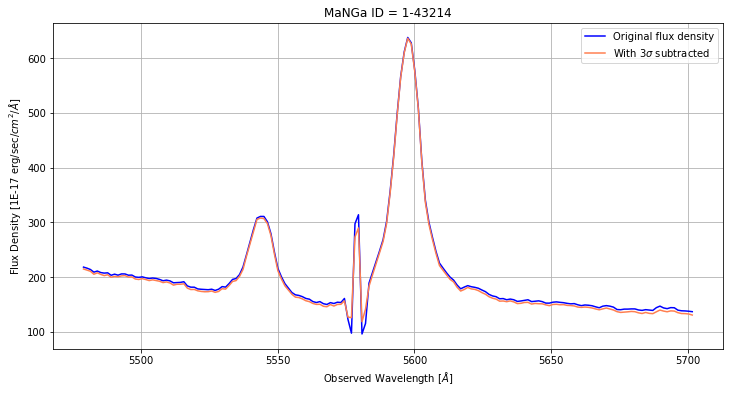

In [111]:
plt.figure(figsize = (12,6))
plt.grid()
plt.plot(wave[wavelength[0] : wavelength[-1] + 1], sumflux[wavelength[0] : wavelength[-1] + 1],
         label = 'Original flux density', color = 'blue')
plt.plot(wave[wavelength[0] : wavelength[-1] + 1], sumresult, label = 'With 3$\sigma$ subtracted',
         color ='coral')
plt.xlabel('Observed Wavelength '+ r'$[\AA]$')
plt.ylabel('Flux Density '+'[1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGa ID = 1-43214')
# plt.axvline(factor*5007, color = 'limegreen')
plt.legend()
# plt.savefig('Images/3sigma.png', bbox_inches = "tight")